In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import pickle
input = open('data_class.pkl', 'rb')
obj = pickle.load(input)
input.close()
X_train = obj["X_train"]
X_test = obj["X_test"]
y_train = obj["y_train"]
y_test = obj["y_test"]

In [3]:
# pip install --ignore-installed --upgrade tensorflow==1.14.0

In [4]:
# pip install keras

In [5]:
from tensorflow import keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

/srv/conda/envs/notebook/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/srv/conda/envs/notebook/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/srv/conda/envs/notebook/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/srv/conda/envs/notebook/lib/python3.7/site-packages/tensorflow/python/frame

In [6]:
cnn = Sequential()

cnn.add(Dense(2, activation = 'relu', input_dim = 3))

cnn.add(Dense(1, activation = 'sigmoid'))

cnn.add(Dense(1, activation = 'sigmoid'))

cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [7]:
import sys
sys.setrecursionlimit(10000)

In [8]:
history = cnn.fit(X_train, y_train, batch_size = 4, epochs = 55, validation_data=(X_test, y_test))

Train on 55 samples, validate on 14 samples
Epoch 1/55
55/55 [==============================] - 0s 5ms/sample - loss: 0.6489 - acc: 0.6182 - val_loss: 0.6259 - val_acc: 0.7143
Epoch 2/55
55/55 [==============================] - 0s 722us/sample - loss: 0.6478 - acc: 0.6182 - val_loss: 0.6247 - val_acc: 0.7143
Epoch 3/55
55/55 [==============================] - 0s 1ms/sample - loss: 0.6467 - acc: 0.6182 - val_loss: 0.6229 - val_acc: 0.7143
Epoch 4/55
55/55 [==============================] - 0s 604us/sample - loss: 0.6456 - acc: 0.6182 - val_loss: 0.6211 - val_acc: 0.7143
Epoch 5/55
55/55 [==============================] - 0s 2ms/sample - loss: 0.6446 - acc: 0.6182 - val_loss: 0.6193 - val_acc: 0.7143
Epoch 6/55
55/55 [==============================] - 0s 1ms/sample - loss: 0.6433 - acc: 0.6182 - val_loss: 0.6178 - val_acc: 0.7143
Epoch 7/55
55/55 [==============================] - 0s 740us/sample - loss: 0.6422 - acc: 0.6182 - val_loss: 0.6167 - val_acc: 0.7143
Epoch 8/55
55/55 [========

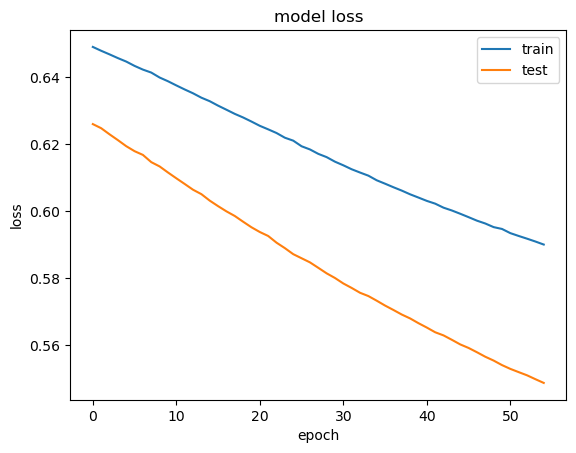

In [9]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

По графику делаем вывод о том, что модель не переобучена. Далее проводим прогнозирование. 

In [10]:
y_pred = cnn.predict(X_test)
y_pred = (y_pred > 0.5)

In [11]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 0  4]
 [ 0 10]]


При помощи нейронной сети получили классификацию данных с точностью 71%. В этом случае моделью тоже лучше распознаны положительные события - успех. Следовательно, логистическая модель лучше справляется с классификацией данных. Одной из причин может быть маленькое количество наблюдений. Эти входные данные слишком просты для построения на их основе нейроных сетей. 
Но следует также отметить тот момент, что негативных случаев в целом меньше, нежели позитивных. Таким образом их распознавание и правильное определение является более ценным результатом. При таком показателе логистическая модель также оказывается в приоритете. 